In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
model = "ada_boost"

In [3]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]

In [4]:
data_df = get_data(drop_columns=REMOVE, normalize=normalize)
x, y = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)

In [5]:
reg = regressor(**params)

In [6]:
preds = cross_val_predict(reg, x, y, cv=10, n_jobs=5)

In [7]:
data_df["predicao"] = preds

In [8]:
data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])

In [9]:
data_df[["paredao", "nome", "rejeicao", "predicao", "erro_absoluto"]].sort_values(by="erro_absoluto")

,paredao,nome,rejeicao,predicao,erro_absoluto
6,7,babu,0.0460,0.057600,0.011600
17,8,babu,0.4771,0.497600,0.020500
4,5,flayslene,0.1764,0.147950,0.028450
18,8,rafa,0.0059,0.038838,0.032938
7,7,manu_gavassi,0.1018,0.067830,0.033970
27,14,gizelly_bicalho,0.5479,0.512443,0.035457
19,8,pyong,0.5170,0.479752,0.037248
28,14,mari,0.0388,0.078008,0.039208
1,6,guilherme,0.5607,0.521300,0.039400
22,15,rafa,0.0631,0.110760,0.047660


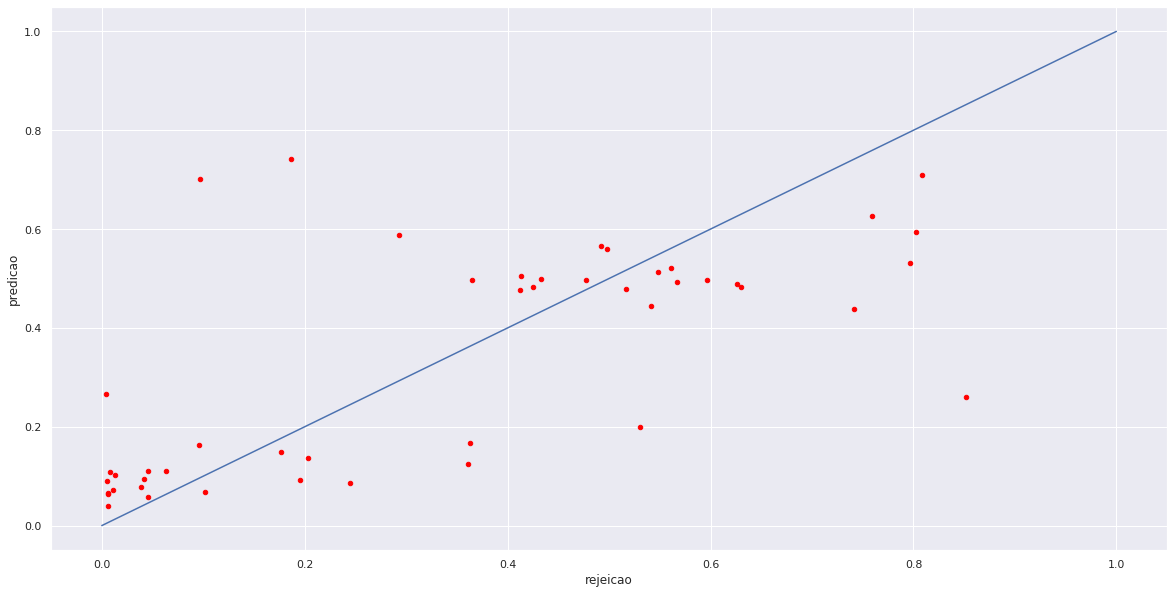

In [10]:
data_df.plot.scatter(x="rejeicao", y="predicao", c="red")
plt.plot([0,1],[0,1])

In [11]:
y_real = data_df["rejeicao"].values
pred = data_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.038915046273396474
mae: 0.13783712803796055
r2: 0.46401192599536056
